## Exploratory Data Analysis - Using Term frequency technique to detect trend

In [2]:
import pandas as pd
import logging
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud 


#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

data = pd.read_pickle('documenttermmatrixtdf.pkl')
data = data.transpose()
data.head()


C:\Users\mukes\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


fashionspotcontent  justthedesign  mariecuriefashiontext  refinery29  \
aa                 0.000000       0.000465               0.000000    0.000000   
aback              0.000000       0.000381               0.000000    0.000000   
abandon            0.001086       0.001342               0.000810    0.000098   
abbasi             0.000000       0.000381               0.000000    0.000000   
abbey              0.000000       0.000238               0.004675    0.000113   

         vogueIndia  voguefashiontext  
aa         0.000000          0.000000  
aback      0.000179          0.000000  
abandon    0.001552          0.001169  
abbasi     0.000179          0.000000  
abbey      0.000560          0.002024

### Top 100 words of each fashion blogs

In [3]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(100)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'fashionspotcontent': [('roundup', 0.41147310361751804),
  ('shop', 0.35047018830396687),
  ('fall', 0.31008143054403015),
  ('spring', 0.29705279900856674),
  ('dress', 0.22213816767965186),
  ('street', 0.1952123291730274),
  ('outfit', 0.16958935381994927),
  ('runway', 0.13614919954559307),
  ('color', 0.1323256347060912),
  ('summer', 0.1235548557279784),
  ('season', 0.12094912942088572),
  ('bag', 0.12051484170303693),
  ('jean', 0.10813764174434666),
  ('tip', 0.10748621016757348),
  ('boot', 0.09858331195167346),
  ('shoe', 0.09814902423382467),
  ('denim', 0.09185185232501734),
  ('print', 0.08729183128760513),
  ('skirt', 0.07556606290568803),
  ('size', 0.07491463132891485),
  ('jacket', 0.0736117681753685),
  ('winter', 0.07296033659859533),
  ('post', 0.07209176116289777),
  ('plus', 0.07100604186827582),
  ('sneaker', 0.06816775121222879),
  ('white', 0.06774888398440995),
  ('pant', 0.06753174012548556),
  ('cloth', 0.06644602083086361),
  ('idea', 0.06297171908807335)

In [4]:
for blog, top_words in top_dict.items():
    print(blog)
    print(', '.join([word for word, count in top_words[0:20]]))
    print('---')

fashionspotcontent
roundup, shop, fall, spring, dress, street, outfit, runway, color, summer, season, bag, jean, tip, boot, shoe, denim, print, skirt, size
---
justthedesign
dress, woman, black, model, cloth, post, feel, love, size, color, share, shop, mani, season, buy, start, good, custom, market, york
---
mariecuriefashiontext
dress, shop, love, season, share, wed, bag, post, queen, high, colour, wore, woman, princess, royal, outfit, gown, cloth, creat, white
---
refinery29
jean, black, bag, dress, white, coat, boot, shoe, jacket, skirt, outfit, leather, shirt, denim, sweater, heel, grey, sneaker, trouser, short
---
vogueIndia
dress, sari, viral, season, white, woman, star, wed, black, colour, red, bag, love, label, cloth, summer, creat, print, outfit, model
---
voguefashiontext
dress, cloth, woman, love, pari, street, york, feel, colour, start, differ, season, creat, bag, idea, summer, mani, beauti, chang, import
---


In [5]:
data_clean = pd.read_pickle('data_cleanog.pkl')

In [6]:
data_clean

fashiontext
fashionspotcontent     certain staples wardrobe needs summer talking ...
justthedesign          reasons embroidery wear itby margaret wright r...
mariecuriefashiontext  words rosanna falconer lets begin elephant roo...
refinery29             velvet material fall runways luxurious colourf...
vogueIndia             designer labels alia bhatt wardrobe viral fash...
voguefashiontext       watcheshow buy watch vogues ultimate guideby r...

## Visulaizing wordcloud of each blog

In [7]:
stop_words = stopwords.words('english')

stop_words.extend(['fashion','style','wear','designer'])
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",width=800, height=400,
               max_font_size=100, random_state=42)

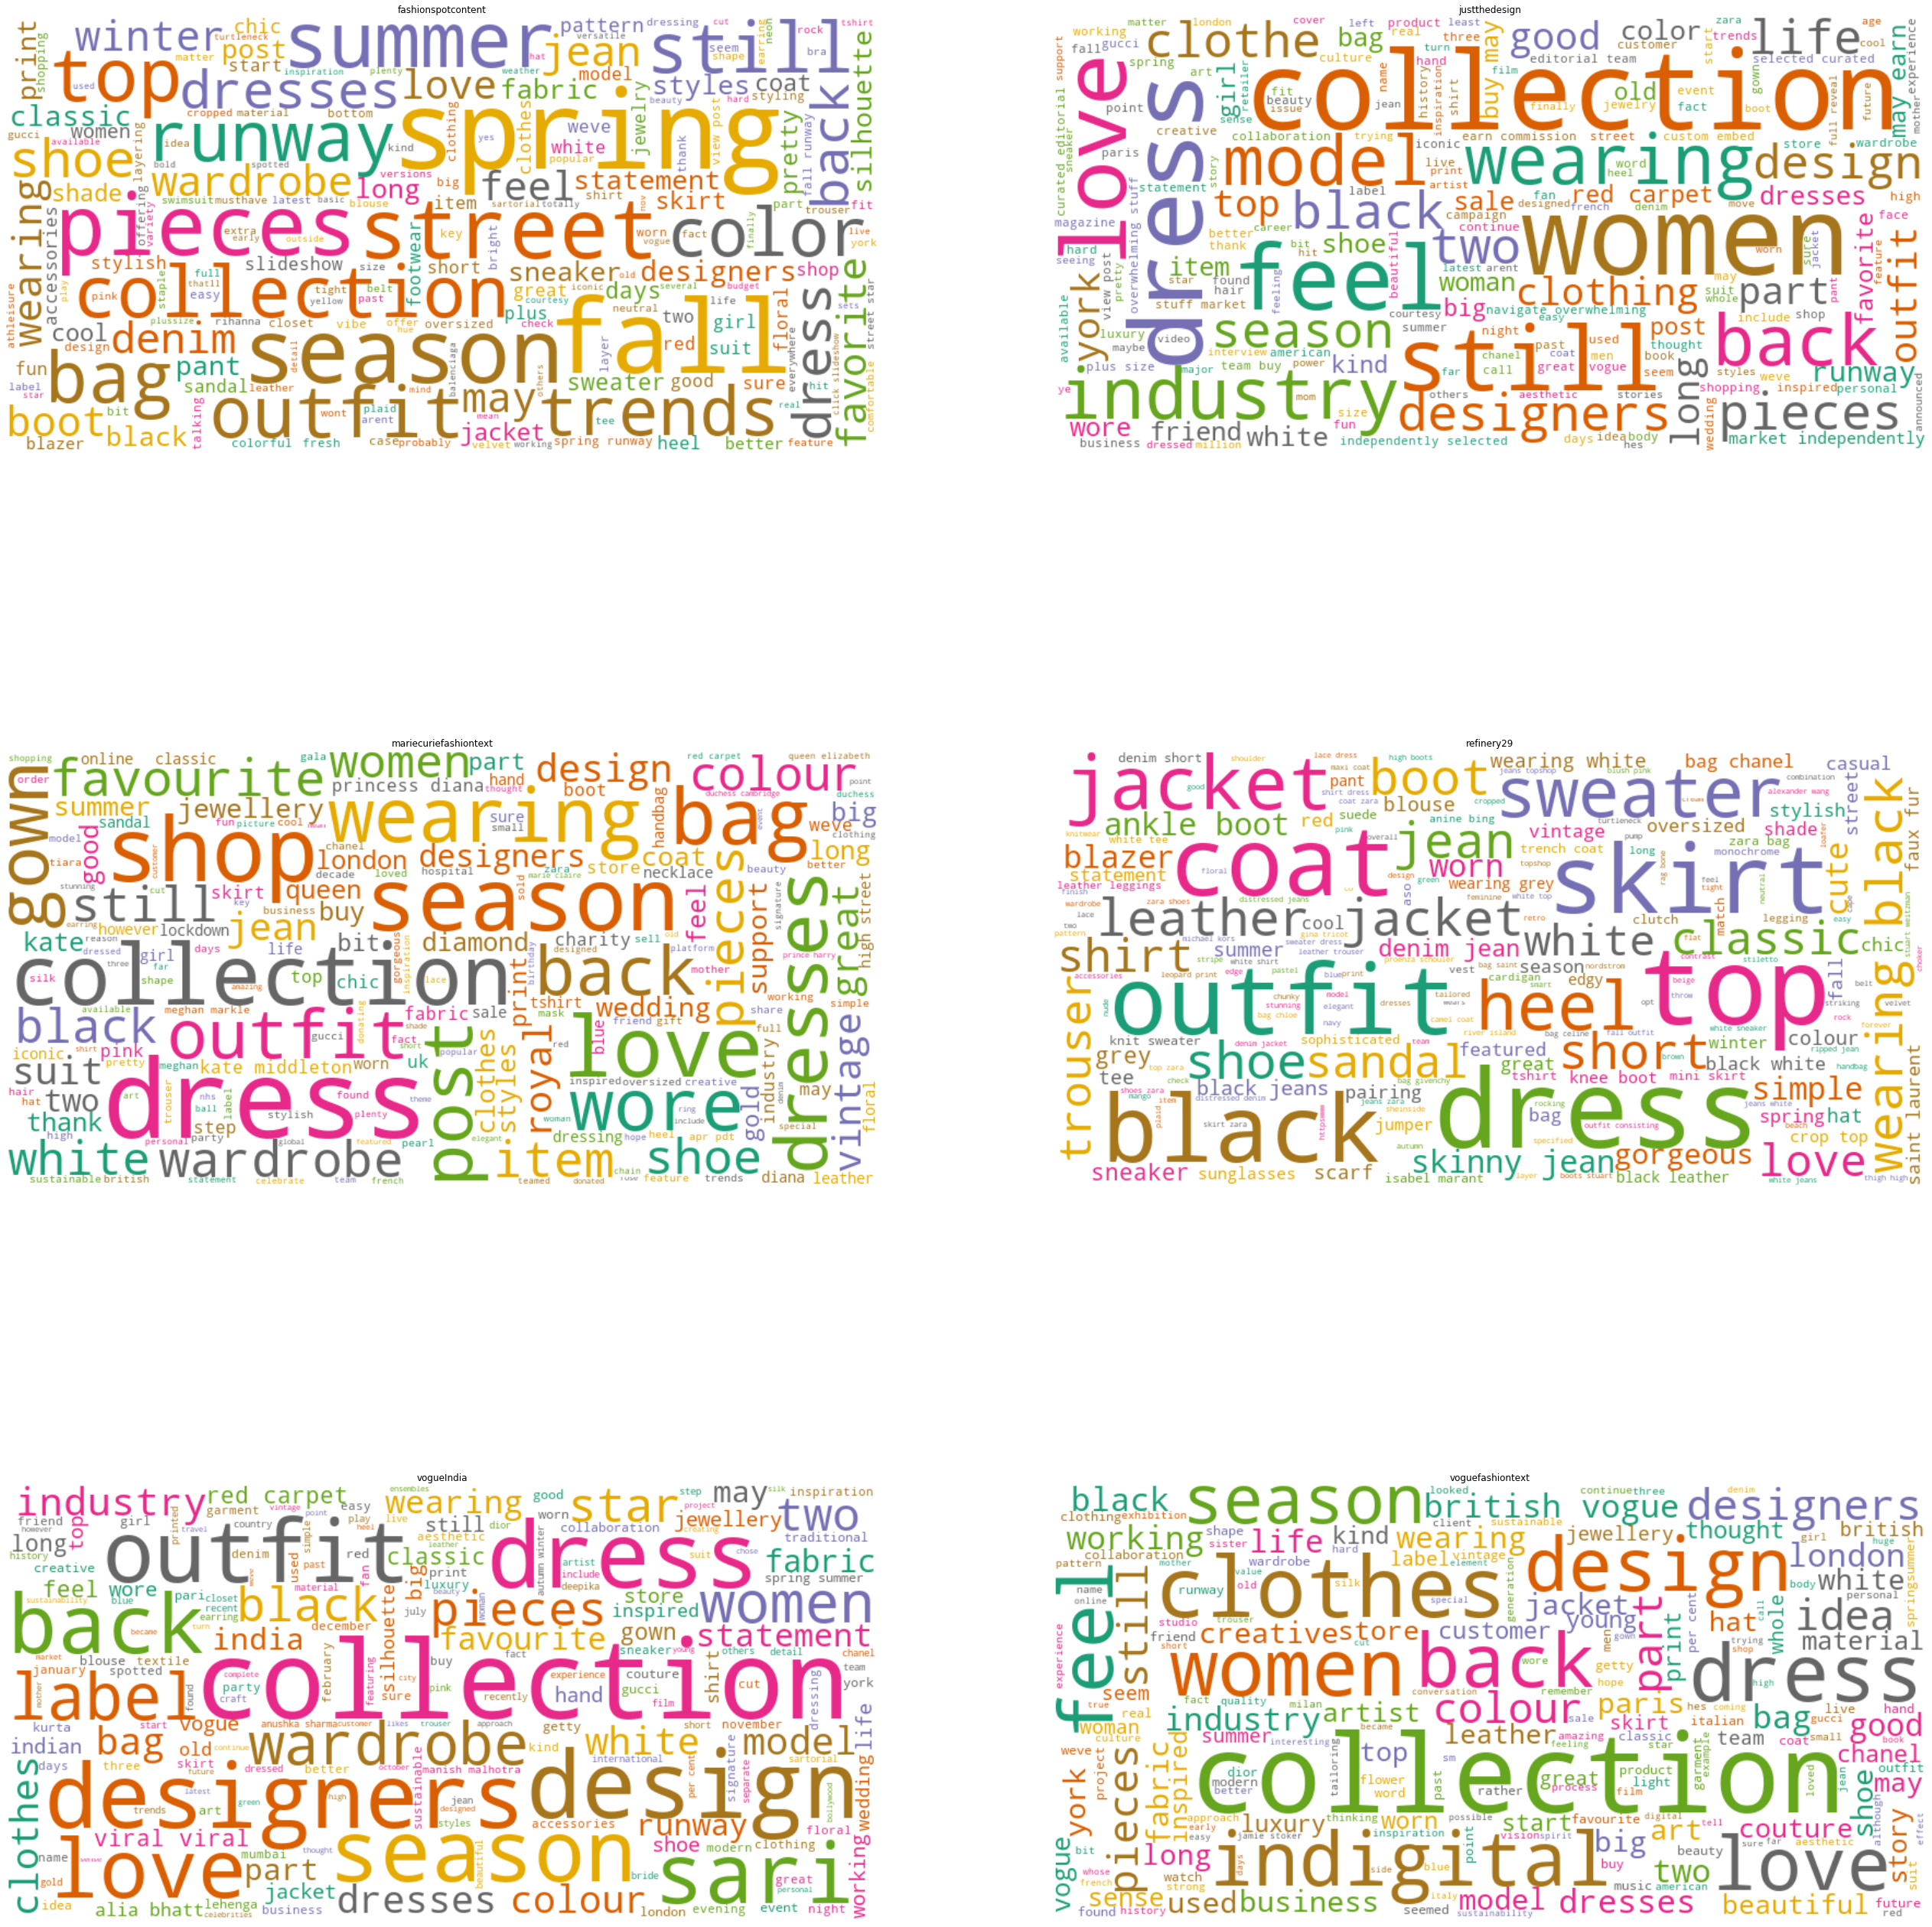

<Figure size 3240x3600 with 0 Axes>

In [15]:
plt.rcParams['figure.figsize'] = [45,50]

full_names = ['fashionspotcontent', 'justthedesign', 'mariecuriefashiontext', 'refinery29', 'vogueIndia', 'voguefashiontext']

# Create subplots for each comedian
for index, fashionblogs in enumerate(data.columns):
    wc.generate(data_clean.fashiontext[fashionblogs])
    
    plt.subplot(3, 2, index+1)
    
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
plt.show()
plt.savefig('wordcloudwebblogfinal')



### Count vectorizer to generate top n words

In [31]:
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)


from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_df = 0.95, min_df = 2, stop_words= stop_words, max_features=10000, ngram_range=(1,3))
X = cv.fit_transform(data_clean['fashiontext'])

In [32]:
print(cv.vocabulary_)

{'miniskirts': 5708, 'overlooked': 6250, 'stash': 8437, 'decide': 2354, 'omnipresent': 6135, 'bike': 834, 'tshirt': 9221, 'baggy': 629, 'midi': 5648, 'highwaisted': 4141, 'mock': 5748, 'hems': 4095, 'logomania': 5224, 'dropping': 2723, 'prefer': 6777, 'oldschool': 6124, 'toppers': 9082, 'slideshow': 8173, 'masks': 5502, 'necessities': 5931, 'musthave': 5875, 'fashionforward': 3240, 'celebs': 1459, 'nancy': 5892, 'professionals': 6895, 'christine': 1634, 'colorful': 1821, 'texture': 8952, 'lisa': 5184, 'fullon': 3582, 'makers': 5378, 'donate': 2649, 'hospitals': 4224, 'medical': 5551, 'thatll': 8959, 'evolve': 3067, 'support': 8717, 'kindness': 4882, 'delivering': 2391, 'teaching': 8876, 'collecting': 1811, 'paying': 6441, 'efforts': 2832, 'donating': 2652, 'charities': 1543, 'bff': 811, 'breakdown': 1144, 'families': 3216, 'bottles': 1101, 'oasis': 6080, 'receive': 7152, 'percent': 6471, 'proceeds': 6881, 'popup': 6689, 'eagle': 2772, 'outfitters': 6226, 'aerie': 153, 'plans': 6606, 's

In [33]:
def get_top_n_words(corpus,n=None):
    vec = CountVectorizer(stop_words= stop_words).fit(data_clean['fashiontext'])
    bag_of_words=vec.transform(data_clean['fashiontext'])
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word , idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [39]:
#Creating data frame of most frequent words for creating visualizations

top_words = get_top_n_words(data_clean['fashiontext'], n=50)
top_df = pd.DataFrame(top_words)
top_df.columns = ['Word', 'Freq']

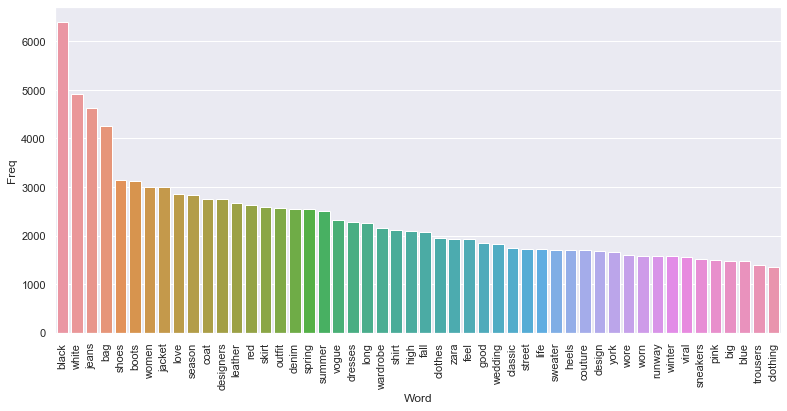

In [40]:

sns.set(rc={'figure.figsize':(13,6)})
g = sns.barplot(x='Word', y='Freq', data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
fig = g.get_figure()
fig.savefig("sns_output.png")

### Top Bigram word (Adding (2,2) as parameter)

In [41]:
def get_top_n2_words(corpus,n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),max_features=2000,stop_words=stop_words).fit(data_clean['fashiontext'])
    bag_of_words=vec1.transform(data_clean['fashiontext'])
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word , idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [42]:
#Creating data frame of most frequent words for creating visualizations

top2_words = get_top_n2_words(data_clean['fashiontext'], n=50)
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ['Bi-gram', 'Freq']

In [45]:
# Creating Bigram Wordcloud
top150_words = get_top_n2_words(data_clean['fashiontext'], n=200)
top150_df = pd.DataFrame(top150_words)
top150_df.columns = ['Bi-gram', 'Freq']
print(top2_df)

                   Bi-gram  Freq
0               red carpet  1066
1           leather jacket   595
2            spring summer   567
3            saint laurent   541
4              viral viral   538
5             skinny jeans   467
6   independently selected   448
7                 buy earn   448
8     market independently   441
9         selected curated   441
10             black white   439
11            stuff market   430
12      overwhelming stuff   429
13       curated editorial   429
14         earn commission   425
15           louis vuitton   423
16           editorial buy   415
17             ankle boots   388
18               plus size   376
19              alia bhatt   375
20           haute couture   365
21             denim jeans   356
22            custom embed   347
23             black jeans   323
24        victorias secret   304
25             white shirt   302
26           autumn winter   285
27                faux fur   282
28         manish malhotra   272
29        

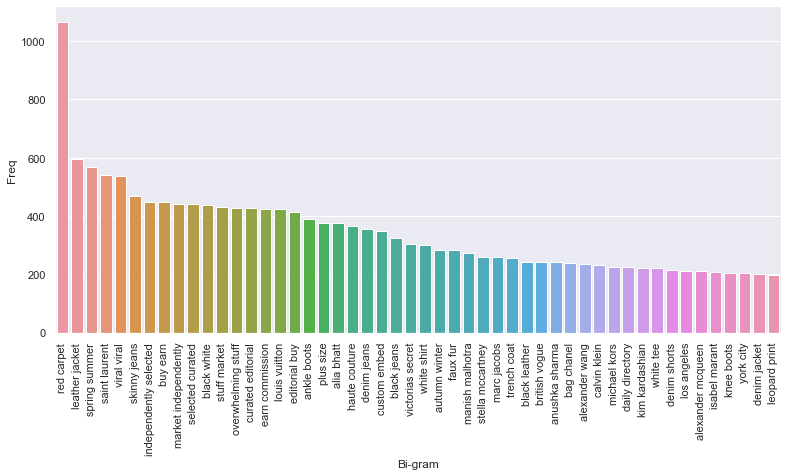

In [46]:
sns.set(rc={'figure.figsize':(13,6)})
h = sns.barplot(x='Bi-gram', y='Freq', data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=90)
fig = h.get_figure()
fig.savefig("sns_output_bigrams.png")

In [47]:
top150_df['Bi_gram'] = top150_df['Bi-gram'].str.replace(' ','_')
top150_df.head(10)

Bi-gram  Freq                 Bi_gram
0              red carpet  1066              red_carpet
1          leather jacket   595          leather_jacket
2           spring summer   567           spring_summer
3           saint laurent   541           saint_laurent
4             viral viral   538             viral_viral
5            skinny jeans   467            skinny_jeans
6  independently selected   448  independently_selected
7                buy earn   448                buy_earn
8    market independently   441    market_independently
9        selected curated   441        selected_curated

In [80]:
top500_df['Bi_gram']=top500_df['Bi-gram'].str.replace(' ','_')

In [81]:
top150_df['Bi_gram']

0           red_carpet
1       leather_jacket
2        spring_summer
3        wearing_black
4        saint_laurent
            ...       
195       bag_givenchy
196          bag_chloe
197        alia_bhatts
198       fall_runways
199    wearing_leather
Name: Bi_gram, Length: 200, dtype: object

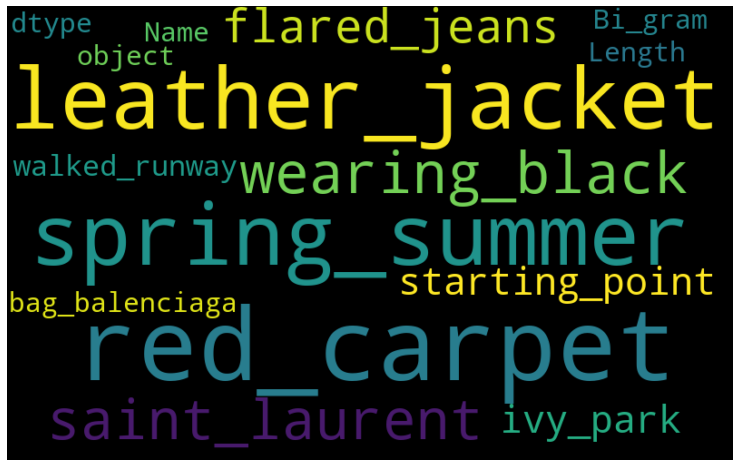

In [82]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(top500_df['Bi_gram'])) 
plt.figure(1,figsize=(13, 10))
fig=plt.figure(1)
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()
fig.savefig('wordcloud_bigramweblog')

In [83]:
import pickle
pickle.dump(vectorizer, open("data_tdfstopcv_stop.pkl", "wb"))
data_tdfstop.to_pickle("dtm_stopexploratory2.pkl")